In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

loading the dataset

In [3]:
dataset = pd.read_csv("train_data_loan.csv")

In [4]:
dataset.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


##checking the missing data in the each coloumn of dataset

In [6]:
dataset.apply(lambda missing_data: sum(missing_data.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
array = dataset.values
X = array[:,6:11]
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=1/3, random_state=0)

In [8]:
x_test

array([[7085, 0.0, 84.0, 360.0, 1.0],
       [4230, 0.0, 112.0, 360.0, 1.0],
       [6133, 3906.0, 324.0, 360.0, 1.0],
       ...,
       [3716, 0.0, 42.0, 180.0, 1.0],
       [2889, 0.0, 45.0, 180.0, 0.0],
       [19730, 5266.0, 570.0, 360.0, 1.0]], dtype=object)

In [9]:
y_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

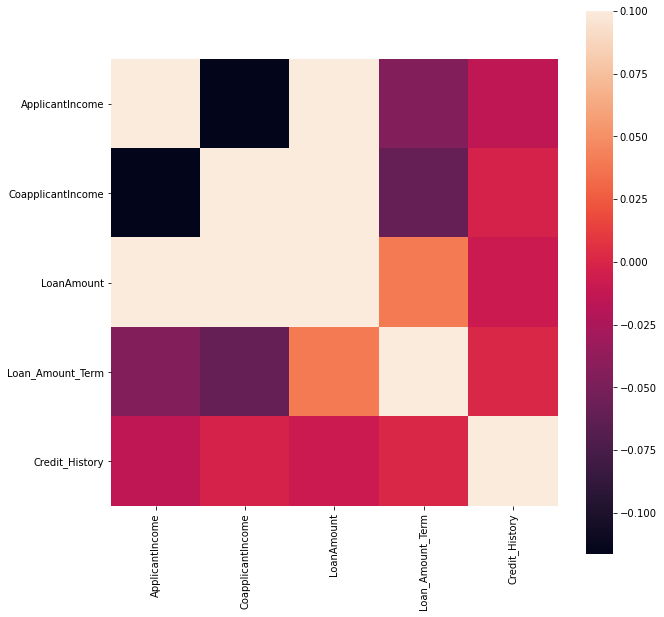

In [10]:
cor=dataset.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cor,vmax=.10,square=True)

##cleaning the data

In [11]:
dataset.Gender=dataset.Gender.map({'Male':1,'Female':0})
dataset.Gender.value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

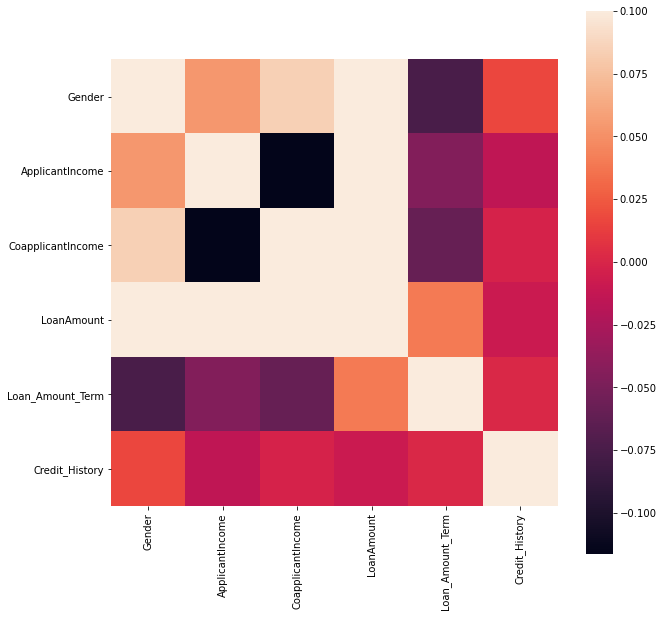

In [12]:
cor=dataset.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cor,vmax=.10,square=True)

In [13]:
dataset.Married=dataset.Married.map({'Yes':1,'No':0})
dataset.Married.value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [14]:
dataset.Dependents=dataset.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
dataset.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

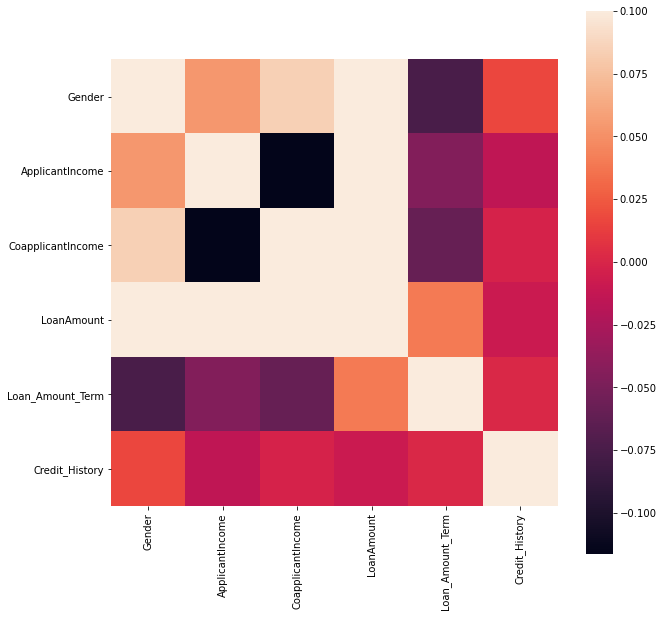

In [15]:
cort=dataset.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cor,vmax=.10,square=True)

In [16]:
dataset.Education=dataset.Education.map({'Graduate':1,'Not Graduate':0})
dataset.Education.value_counts()

1    480
0    134
Name: Education, dtype: int64

In [17]:
dataset.Self_Employed=dataset.Self_Employed.map({'Yes':1,'No':0})
dataset.Self_Employed.value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [18]:
dataset.Property_Area.value_counts()
dataset.Property_Area=dataset.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
dataset.Property_Area.value_counts()


1    233
2    202
0    179
Name: Property_Area, dtype: int64

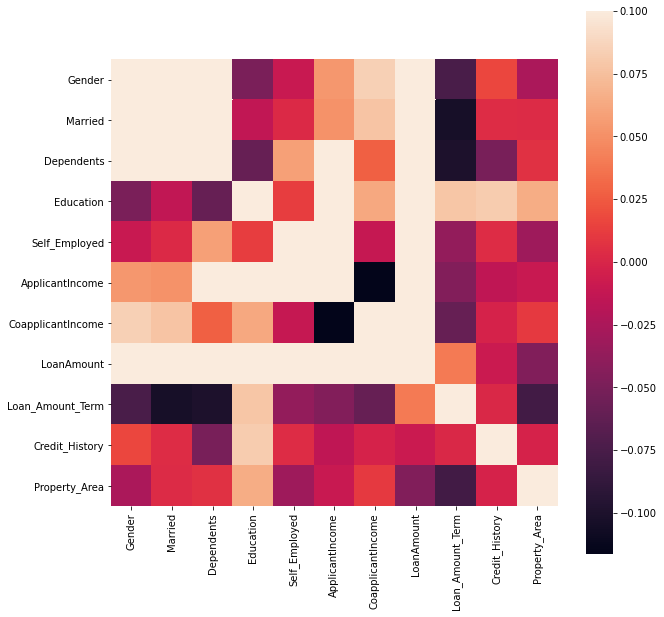

In [19]:
cor=dataset.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cor,vmax=.10,square=True)

In [20]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,Y
6,LP001013,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,2,Y
7,LP001014,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1,N
8,LP001018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,2,Y
9,LP001020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1,N


In [21]:
dataset.Married.fillna(np.random.randint(0,2),inplace=True)
dataset.isnull().sum()          

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
dataset.LoanAmount.fillna(dataset.LoanAmount.median(),inplace=True)
dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean(),inplace=True)
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
dataset.Gender.value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [24]:
from random import randint
dataset.Gender.fillna(np.random.randint(0,2),inplace=True)
dataset.Gender.value_counts()


1.0    502
0.0    112
Name: Gender, dtype: int64

In [25]:
dataset.Credit_History.fillna(np.random.randint(0,2),inplace=True)
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
dataset.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
dataset.Dependents.fillna(dataset.Dependents.median(),inplace=True)
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
dataset.type()

AttributeError: 'DataFrame' object has no attribute 'type'

#encoding the data

In [ ]:
le_x = LabelEncoder()

#encoding the independent data

In [ ]:
for i in range(0, 5):
    x_train[:,i] = le_x.fit_transform(x_train[:,i])

x_train[:,4]= le_x.fit_transform(x_train[:,4])

In [ ]:
x_train

#encoding the dependent data

In [ ]:
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)

In [ ]:
y_train

In [ ]:
le_X = LabelEncoder()
for i in range(0, 5):
    x_test[:,i] = le_X.fit_transform(x_test[:,i])
x_test[:,4] = le_x.fit_transform(x_test[:,4])

In [ ]:
x_test

In [ ]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [ ]:
y_test

split the data

In [ ]:
array = dataset.values
X = array[:,6:11]
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

#fitting algorithm to the trainimg set

In [ ]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("rfc",RandomForestClassifier()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))

In [ ]:
seed=7
scoring='accuracy'

In [ ]:
result=[]
names=[]

In [ ]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

In [ ]:
svc=LogisticRegression()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))